# HOMEWORK 3

In [ ]:
import sympy as sp
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

**QUESTION**

Using two-group theory, determine the critical core width of a slab reactor with core composition similar to that of a PWR and surrouded by an infinite water reflector. Use the following data for the core. Subscript 1 refers to fast group whereas subscript 2 refers to thermal group.

In [ ]:
# Problem data

FastFissionFactor = 1.27
y_0 = 340#cm
z_0 = 370#cm

#CORE
#G1
nu_Sigmaf_C1_val = 0.008476
Sigmaa_C1_val = 0.01207
D_C1_val = 1.2627
SigmaR_C1_val = 0.02619
#G2
nu_Sigmaf_C2_val = 0.18514
Sigmaa_C2_val = 0.121
D_C2_val = 0.3543
SigmaR_C2_val = 0.121

#REFLECTOR
#G1
Sigmaa_R1_val = 0.0004
D_R1_val = 1.13
SigmaR_R1_val = 0.0494
#G2
Sigmaa_R2_val = 0.0197
D_R2_val = 0.16
SigmaR_R2_val = 0.0197


In [ ]:
#in scattering terms
Sigma12_C2_val = SigmaR_C1_val-Sigmaa_C1_val
Sigma12_R2_val = SigmaR_R1_val-Sigmaa_R1_val

# 1.GENERALITIES ABOUT PROBLEM SOLUTION

**ASSUMPTIONS:**

Consider the following assumptions (2G):
* One fast group and one thermal group
* No upscatter from thermal to fast
* Fission reactions only in the thermal group, all fission neutrons emitted in the fast group
* Effects of fast fission are taken into account with the fast fission factor $\epsilon$.

We are considering a 1D domain. We can use the *transverse buckling* $B_T$ to take into account the effects of neutron leakage in the transverse direction (out-scattering term):

\begin{equation}
  B_T^2 = \left(\frac{\pi}{y_0 + 2\delta}\right)^2 + \left(\frac{\pi}{z_0 + 2\delta}\right)^2
\end{equation}

Based on the assumptions above (refer to Lesson 35 Slide 7):
\begin{aligned}
  &\text{Core Fast: Leakage + Out-scattering = Production} \\
  &\text{Core Thermal: Leakage + Out-scattering = In-Scattering} \\
  &\text{Reflector Fast: Leakage + Out-scattering = 0} \\ 
  &\text{Reflector Thermal: Leakage + Out-scattering = In-Scattering} \\
\end{aligned}

**EQUATIONS AND CONDITIONS:**

\begin{aligned}
  -D_{1c}\frac{d^2\varphi_{1c}}{dx^2} + (\Sigma_{1ac}+\Sigma_{1\rightarrow 2c} + D_{1c}B_T^2)\varphi_{1c} = \epsilon\nu\Sigma_{f2}\varphi_{2c} \quad &\text{Core G1} \\
  -D_{2c}\frac{d^2\varphi_{2c}}{dx^2} + (\Sigma_{2ac} + D_{2c}B_T^2)\varphi_{2c} = \Sigma_{1\rightarrow 2c}\varphi_{1c} \quad &\text{Core G2} \\
  -D_{1r}\frac{d^2\varphi_{1r}}{dx^2} + (\Sigma_{1ar}+\Sigma_{1\rightarrow 2r} + D_{1r}B_T^2)\varphi_{1r} = 0 \quad &\text{Reflector G1} \\
  -D_{2r}\frac{d^2\varphi_{2r}}{dx^2} + (\Sigma_{2ar} + D_{2r}B_T^2)\varphi_{2r} = \Sigma_{1\rightarrow 2r}\varphi_{1r} \quad &\text{Reflector G2} \\
\end{aligned}


Boundary conditions:
* $\frac{d\varphi_{1c}}{dx}\Big\vert_{x=0}$ = 0 (symmetry)
* $\frac{d\varphi_{2c}}{dx}\Big\vert_{x=0}$ = 0 (symmetry)
* $\varphi_{1c}(a) = \varphi_{1r}(a)$ (flux interface)
* $\varphi_{2c}(a) = \varphi_{2r}(a)$ (flux interface)
* $-D_{1c}\frac{d\varphi_{1c}}{dx}\Big\vert_{x=a} = -D_{1r}\frac{d\varphi_{1r}}{dx}\Big\vert_{x=a}$ (current interface)
* $-D_{2c}\frac{d\varphi_{2c}}{dx}\Big\vert_{x=a} = -D_{2r}\frac{d\varphi_{2r}}{dx}\Big\vert_{x=a}$ (current interface)
* $\lim_{x\rightarrow \infty}\varphi_{1r}(x)$ = 0 (boundedness)
* $\lim_{x\rightarrow \infty}\varphi_{2r}(x)$ = 0 (boundedness)



In [ ]:
#Equations

x = sp.Symbol("x")

D_C1, D_C2, D_R1, D_R2 = sp.symbols("D_{C1}, D_{C2}, D_{R1}, D_{R2}")

Sigma_C1, Sigma_C2, Sigma_R1, Sigma_R2 = sp.symbols("\Sigma_{C1}, \Sigma_{C2}, \Sigma_{R1}, \Sigma_{R2}")  #Total

Sigma12_C2, Sigma12_R2 = sp.symbols("\Sigma_{12_{C2}}, \Sigma_{12_{R2}}")

eps = sp.Symbol("\epsilon")

nu = sp.Symbol("nu")
Sigmaf_C2 = sp.Symbol("\Sigma_{f_{C2}}")

Phi1C, Phi2C, Phi1R, Phi2R = sp.symbols("\phi_{1C}, \phi_{2C}, \phi_{1R}, \phi_{2R}", cls=sp.Function)


In [ ]:
#Core G1

Core_G1_Equation = sp.Eq( -D_C1*Phi1C(x).diff(x,2) + Sigma_C1*Phi1C(x) , eps*nu*Sigmaf_C2*Phi2C(x))
Core_G1_Equation

Eq(-D_{C1}*Derivative(\phi_{1C}(x), (x, 2)) + \Sigma_{C1}*\phi_{1C}(x), \Sigma_{f_{C2}}*\epsilon*nu*\phi_{2C}(x))

In [ ]:
#Core G2

Core_G2_Equation = sp.Eq( -D_C2*Phi2C(x).diff(x,2) + Sigma_C2*Phi2C(x) , Sigma12_C2*Phi1C(x))
Core_G2_Equation

Eq(-D_{C2}*Derivative(\phi_{2C}(x), (x, 2)) + \Sigma_{C2}*\phi_{2C}(x), \Sigma_{12_{C2}}*\phi_{1C}(x))

In [ ]:
#Reflector G1

Ref_G1_Equation = sp.Eq( -D_R1*Phi1R(x).diff(x,2) + Sigma_R1*Phi1R(x) , 0)
Ref_G1_Equation

Eq(-D_{R1}*Derivative(\phi_{1R}(x), (x, 2)) + \Sigma_{R1}*\phi_{1R}(x), 0)

In [ ]:
# Reflector G2

Ref_G2_Equation = sp.Eq( -D_R2*Phi2R(x).diff(x,2) + Sigma_R2*Phi2R(x) , Sigma12_R2*Phi1R(x))
Ref_G2_Equation

Eq(-D_{R2}*Derivative(\phi_{2R}(x), (x, 2)) + \Sigma_{R2}*\phi_{2R}(x), \Sigma_{12_{R2}}*\phi_{1R}(x))

# 2.CORE-PROBLEM RESOLUTION


Overall out-scattering cross-sections considering also the transverse buckling (core):
\begin{aligned}
  \Sigma_{C1} &= \Sigma_{1ac}+\Sigma_{1\rightarrow 2c} + D_{1c}B_T^2 \\
  \Sigma_{C2} &= \Sigma_{2ac}+D_{2c}B_T^2
\end{aligned}

Use the concept of buckling (Lesson 35 Slide 13) and substitute:
\begin{aligned}
  \frac{d\varphi_{1c}}{dx^2} + B^2\varphi_{1c} = 0 \\
  \frac{d\varphi_{2c}}{dx^2} + B^2\varphi_{2c} = 0
\end{aligned}

\begin{aligned}
  D_{1c}B^2\varphi_{1c} + \Sigma_{C1}\varphi_{1c} - \epsilon\nu\Sigma_{f2}\varphi_{2c} = 0 \quad &\text{Core G1} \\
  D_{2c}B^2\varphi_{2c} + \Sigma_{C2}\varphi_{2c} - \Sigma_{1\rightarrow 2c}\varphi_{1c} = 0 \quad &\text{Core G2} \\
\end{aligned}

In matrix form:
\begin{equation}
\begin{bmatrix}
  D_{1c}B^2 + \Sigma_{C1} & -\epsilon\nu\Sigma_{f2} \\
  -\Sigma_{1\rightarrow 2c} & D_{2c}B^2 + \Sigma_{C2}
\end{bmatrix}\begin{bmatrix}
  \varphi_{1c} \\
  \varphi_{2c} \\
\end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}\end{equation}

By putting the determinant equal to zero we can determine the two roots for the Buckling, a positive one and a negative one (so we have different signs! As a reference, $\mu^2$ is the positive one, $-\lambda^2$ is the negative one.

There are two solutions:
\begin{aligned}
  \frac{dX^2}{dx^2} + \mu^2X = 0 \\
  \frac{dY}{dx^2} - \lambda^2Y= 0
\end{aligned}

And thus:
\begin{aligned}
  \varphi_{1c} = A_1 X(x) + B_1 Y(x) \\
  \varphi_{2c} = A_2 X(x) + B_2 Y(x)
\end{aligned}

In [ ]:
#Geom Buckling
Bg2 = sp.Symbol("B_g^2")
BT2_val = (np.pi/(y_0))**2 + (np.pi/(z_0))**2
Sigma_C1_val = SigmaR_C1_val + D_C1_val*BT2_val
Sigma_C2_val = Sigmaa_C2_val + D_C2_val*BT2_val

#Matrices
M_core = sp.zeros(2,2)
n_core = sp.Matrix([Phi1C, Phi2C])

M_core[0,0] = D_C1*Bg2 + Sigma_C1
M_core[0,1] = -eps*nu*Sigmaf_C2
M_core[1,0] = -Sigma12_C2
M_core[1,1] = D_C2*Bg2 + Sigma_C2

print("Transversal Buckling (squared): " + str(BT2_val))
print("Matrix M:\n")
M_core

Transversal Buckling (squared): 0.00015747073175398043
Matrix M:



Matrix([
[B_g^2*D_{C1} + \Sigma_{C1}, -\Sigma_{f_{C2}}*\epsilon*nu],
[         -\Sigma_{12_{C2}},   B_g^2*D_{C2} + \Sigma_{C2}]])

In [ ]:
#Roots Core
mu, lambd = sp.symbols("\mu, \lambda")

detM_core = sp.det(M_core)
detEquationCore = sp.Eq(detM_core,0)
detSolutionCore = sp.solve(detEquationCore , Bg2)

mu2_val = detSolutionCore[0].subs({D_C1:D_C1_val, D_C2:D_C2_val, eps:FastFissionFactor, nu:1, Sigmaf_C2:nu_Sigmaf_C2_val, Sigma12_C2:Sigma12_C2_val, Sigma_C1:Sigma_C1_val, Sigma_C2:Sigma_C2_val})
lambd2_val = detSolutionCore[1].subs({D_C1:D_C1_val, D_C2:D_C2_val, eps:FastFissionFactor, nu:1, Sigmaf_C2:nu_Sigmaf_C2_val, Sigma12_C2:Sigma12_C2_val, Sigma_C1:Sigma_C1_val, Sigma_C2:Sigma_C2_val})


In [ ]:
print("Transversal Buckling (squared): " + str(BT2_val))
print("Overall core cross sections: " + str(Sigma_C1_val) + " (fast); " + str(Sigma_C2_val) + " (thermal)")
print("First root value: " + str(mu2_val))
print("Second root value: " + str(lambd2_val))

Transversal Buckling (squared): 0.00015747073175398043
Overall core cross sections: 0.02638883829298575 (fast); 0.12105579188026043 (thermal)
First root value: 0.000771954624628785
Second root value: -0.363346651955820


In [ ]:
#Determining Fluxes for Core
X, Y = sp.symbols("X, Y", cls=sp.Function)
C1, C2, C3, C4 = sp.symbols("C1, C2, C3, C4 ")
A1, A2, B1, B2 = sp.symbols("A1, A2, B1, B2")


In [ ]:
FirstEq = sp.Eq(X(x) , C1*sp.cos(mu*x) + C2*sp.sin(mu*x))
FirstEq.subs(C2,0) #for symmetry in the core

Eq(X(x), C1*cos(\mu*x))

In [ ]:
SecondEq = sp.Eq(Y(x) , C3*sp.cosh(lambd*x) + C4*sp.sinh(lambd*x))
SecondEq.subs(C4,0) #for symmetry in the core

Eq(Y(x), C3*cosh(\lambda*x))

In [ ]:
#Fast Flux Core

FastFluxCore = sp.Eq(Phi1C(x), A1*sp.cos(mu*x) + B1*sp.cosh(lambd*x))
FastFluxCore

Eq(\phi_{1C}(x), A1*cos(\mu*x) + B1*cosh(\lambda*x))

In [ ]:
#Thermal Flux Core

ThermalFluxCore = sp.Eq(Phi2C(x), A2*sp.cos(mu*x) + B2*sp.cosh(lambd*x))
ThermalFluxCore

Eq(\phi_{2C}(x), A2*cos(\mu*x) + B2*cosh(\lambda*x))

# 3.REFLECTOR-PROBLEM RESOLUTION

Overall reflector out-scattering cross-sections:
\begin{aligned}
  \Sigma_{R1} &= \Sigma_{1ar}+\Sigma_{1\rightarrow 2r} + D_{1r}B_T^2 \\
  \Sigma_{R2} &= \Sigma_{2ar}+D_{2r}B_T^2
\end{aligned}

First group equation can be solved directly cause appears just one flux term.

To solve the second group equation: you can assume the shape of the solution or proceed like before (hint: in the second group reflector flux you also need to take into account the production term due to fast neutrons scattering).

**EQUATIONs:**

\begin{aligned}
-D_{1r}\frac{d^2\varphi_{1r}}{dx^2} + \Sigma_{R1}\varphi_{1r} = 0 \quad &\text{Reflector G1} \\
  -D_{2r}\frac{d^2\varphi_{2r}}{dx^2} + \Sigma_{R2}\varphi_{2r} = \Sigma_{1\rightarrow 2r}\varphi_{1r} \quad &\text{Reflector G2} \\
\end{aligned}

The first one can be solved directly with recalling the general solution of this kind of equations, which is the form of an exponential.

For the second group, the equation is:

\begin{equation}
  -D_{2r}\frac{d^2\varphi_{2r}}{dx^2} + \Sigma_{2r}\varphi_{2r} - \Sigma_{1\rightarrow 2r}\varphi_{1r} = 0
\end{equation}

Can be rewritten as:

\begin{equation}
  \frac{d^2\varphi_{2r}}{dx^2} - \frac{1}{L^2_{2R}}\varphi_{2r} + \frac{\Sigma_{1\rightarrow 2r}}{D_{2r}}\varphi_{1r} = 0
\end{equation}

We can look for a general solution of the type:

\begin{equation}
  \varphi_{2r}(x) = 
  F_2 exp(-\frac{x}{L_{1R}}) + E_2 exp(-\frac{x}{L_{2R}})
\end{equation}

Inserting in the above equation we obtain:

\begin{equation}
  \frac{F_2}{L^{2}_{1R}} exp(-\frac{x}{L_{1R}}) + \frac{E_2}{L^{2}_{2R}}
  exp(-\frac{x}{L_{2R}}) - \frac{1}{L^{2}_{2R}} [F_2 exp(-\frac{x}{L_{1R}}) + E_2 exp(-\frac{x}{L_{2R}})] + \frac{\Sigma_{1\rightarrow 2r}}{D_{2r}} F_1 exp(-\frac{x}{L_{1R}}) = 0
\end{equation}

Simplifying:

\begin{equation}
\frac{F_2}{L^2_{1R}} - \frac{F_2}{L^2_{2R}} + \frac{\Sigma_{1\rightarrow 2r}}{D_{2r}}F_1= 0
\end{equation}


We can link together 2 coefficients $F_1$ and $F_2$

In [ ]:
#Some parameters

L_1R, L_2R = sp.symbols("L_{1R}, L_{2R}")
E1, E2, F1, F2 = sp.symbols("E1, E2, F1, F2")

L_1R_val = sp.sqrt(D_R1_val/ (SigmaR_R1_val + D_R1_val*BT2_val))
L_2R_val = sp.sqrt(D_R2_val/(Sigmaa_R2_val + D_R2_val*BT2_val))

print("Reflector Diffusion Length (squared): " + str(L_1R_val**2) + " (fast); " + str(L_2R_val**2) + " (thermal)")

Reflector Diffusion Length (squared): 22.7923942802332 (fast); 8.11145326715478 (thermal)


In [ ]:
#First Group Resolution

FastFluxReflector = sp.Eq(Phi1R(x), E1*sp.exp(x/L_1R) + F1*sp.exp(-x/L_1R))
FastFluxReflector.subs(E1,0) #for bondness on flux

Eq(\phi_{1R}(x), F1*exp(-x/L_{1R}))

In [ ]:
#Second Group Resolution

ThermalFluxReflector = sp.Eq(Phi2R(x), E2*sp.exp(-x/L_2R) + F2*sp.exp(-x/L_1R))
ThermalFluxReflector

Eq(\phi_{2R}(x), E2*exp(-x/L_{2R}) + F2*exp(-x/L_{1R}))

**SYSTEM OF EQUATIONS:** (I have studied only for x>0 to avoid Abs(x) notation)

*CORE:*
\begin{aligned}
&\\
\phi_{1C} &= A_1 cos(\mu x) + B_1 cosh(\lambda x) \\
&\\
\phi_{2C} &= A_2 cos(\mu x) + B_2 cosh(\lambda x) \\
&\\
\end{aligned}

*REFLECTOR:*
\begin{aligned}
&\\
\phi_{1R} &= F_1 exp(-\frac{x}{L_{1R}}) \\
&\\
\phi_{2R} &=  F_2 exp(-\frac{x}{L_{1R}}) +  E_2 exp(-\frac{x}{L_{2R}}) \\
&\\
\end{aligned}

*COUPLING COEFFICIENTS:*

We can exploit these Coupling coefficients for simplifying the system:

\begin{aligned}
  S_{1c} &= \frac{A _2}{A_1} = \frac {D_{1c}\mu^2 + \Sigma_{1c}}{\epsilon\nu\Sigma_{f_2}}\\
  S_{2c} &= \frac{B _2}{B_1} = \frac {D_{1c}\lambda^2 + \Sigma_{1c}}{\epsilon\nu\Sigma_{f_2}} \\
  S_{1r} &= \frac{F_2}{F_1} = \frac{\frac{\Sigma_{1\rightarrow 2r}}{D_{2r}}}
  {{L_{1R}^2 - L_{2R}^2}} (L_{1R}^2 L_{2R}^2)
\end{aligned}


So we obtain:

*FINAL SYSTEM:*

\begin{aligned}
&\\
\phi_{1C} &= A_1 cos(\mu x) + B_1 cosh(\lambda x) \\
&\\
\phi_{2C} &= S_{1c} A_1 cos(\mu x) + S_{2c} B_1 cosh(\lambda x) \\
&\\
\phi_{1R} &= F_1 exp(-\frac{x}{L_{1R}}) \\
&\\
\phi_{2R} &=  S_{1r}F_1 exp(-\frac{x}{L_{1R}}) +  E_2 exp(-\frac{x}{L_{2R}}) \\
&\\
\end{aligned}


In this way we have just 4 unknown!!

In [ ]:
#Coupling Coefficients

S1C = (D_C1_val*mu2_val + Sigma_C1_val)/ (FastFissionFactor*nu_Sigmaf_C2_val)
S2C = (-D_C1_val*(-lambd2_val) + Sigma_C2_val)/ (FastFissionFactor*nu_Sigmaf_C2_val)
S1R = (Sigma12_R2_val/ D_R2_val)*(L_1R_val**2 * L_2R_val**2)/(L_1R_val**2 - L_2R_val**2)

print("Coupling Coefficient S1c: " + str(S1C) + "\n")
print("Coupling Coefficient S2c: " + str(S2C) + "\n")
print("Coupling Coefficient S1r: " + str(S1R))

Coupling Coefficient S1c: 0.116377499374827

Coupling Coefficient S2c: -1.43641894129215

Coupling Coefficient S1r: 3.85665529010239


# 4.APPLICATION OF BOUNDARY CONDITIONS


Recalling Boundary Conditions:

* $\varphi_{1c}(a) = \varphi_{1r}(a)$ (flux interface)

* $\varphi_{2c}(a) = \varphi_{2r}(a)$ (flux interface)

* $-D_{1c}\frac{d\varphi_{1c}}{dx}\Big\vert_{x=a} = -D_{1r}\frac{d\varphi_{1r}}{dx}\Big\vert_{x=a}$ (current interface)

* $-D_{2c}\frac{d\varphi_{2c}}{dx}\Big\vert_{x=a} = -D_{2r}\frac{d\varphi_{2r}}{dx}\Big\vert_{x=a}$ (current interface)


Applying these Boundary conditions we obtain a matricial form that can be solved to compute the dimension of the core slab (which is the only one unknownin the system). (I have omitted the procedure that I have done by hand)

\begin{equation}
\begin{bmatrix}
  cos(\mu a) & cosh(\lambda a) & -exp(-\frac{a}{L_1}) & 0 \\
  S_{1c} cos(\mu a) & S_{2c} cosh(\lambda a) & -S_{1r} exp(-\frac{a}{L_1}) & -exp(-\frac{a}{L_2}) \\
  D_{1c}\mu sin(\mu a) & - D_{1c}\lambda sinh(\lambda a) & -\frac{D_{1r}}{L_1}exp(-\frac{a}{L_1}) & 0 \\
  D_{2c}S_{1c}\mu sin(\mu a)) & -D_{2c}S_{2c}\lambda sinh(\lambda a)) & -\frac{S_{1r}D_{2r}}{L_1} exp(-\frac{a}{L_1}) & -\frac{D_{2r}}{L_2} exp(-\frac{a}{L_2})
\end{bmatrix}\begin{bmatrix}
  A_1 \\
  B_1 \\
  F_1 \\
  E_2 
\end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}\end{equation}

In [ ]:
#Final Matrix
a = sp.Symbol("a")
Matrix = sp.zeros(4,4)

Matrix[0,0] = sp.cos(sp.sqrt(mu)*a)
Matrix[0,1] = sp.cosh(sp.sqrt(lambd)*a)
Matrix[0,2] = -sp.exp(-a/ L_1R)
Matrix[0,3] = 0
Matrix[1,0] = S1C*sp.cos(sp.sqrt(mu)*a)
Matrix[1,1] = S2C*sp.cosh(sp.sqrt(lambd)*a)
Matrix[1,2] = -S1R*sp.exp(-a/L_1R)
Matrix[1,3] = -sp.exp(-a/L_2R)
Matrix[2,0] = D_C1*sp.sqrt(mu)*sp.sin(sp.sqrt(mu)*a)
Matrix[2,1] = -D_C1*sp.sqrt(lambd)*sp.sinh(lambd*a)
Matrix[2,2] = -(D_R1/L_1R)*sp.exp(-a/L_1R)
Matrix[2,3] = 0
Matrix[3,0] = D_C2*sp.sqrt(mu)*S1C*sp.sin(sp.sqrt(mu)*a)
Matrix[3,1] = -D_C2*sp.sqrt(lambd)*S2C*sp.sinh(sp.sqrt(lambd)*a)
Matrix[3,2] = -(D_R2/L_1R)*S1R*sp.exp(-a/L_1R)
Matrix[3,3] = -(D_R2/L_2R)*sp.exp(-a/L_2R)

#I have called mu and lambda the two roots that are squared

In [ ]:
Matrix_val = Matrix.subs({mu:mu2_val, lambd:-lambd2_val, L_1R:L_1R_val, L_2R:L_2R_val, D_C1:D_C1_val, D_C2:D_C2_val, D_R1:D_R1_val, D_R2:D_R2_val})
MatrixDet = sp.det(Matrix_val)
detEquationMatrix = sp.Eq(MatrixDet,0)


Half Slab dimension: 50.0851
Reactor Dimension: 100.17



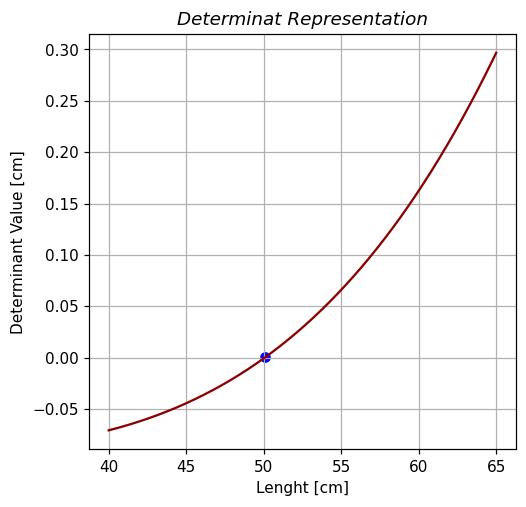

In [ ]:
l = np.linspace(40,65,1000)

MatrixDetLambd = sp.lambdify(a, MatrixDet)
plt.figure(figsize=(5,5), dpi=110);
plt.plot(l, MatrixDetLambd(l), color="darkred");
plt.title("Determinat Representation", style="italic", fontsize=12);
plt.xlabel("Lenght [cm]", fontsize=10);
plt.ylabel("Determinant Value [cm]", fontsize=10);

H = np.where(MatrixDetLambd(l)>0)
P = l[H[0][0]]
plt.scatter(P,MatrixDetLambd(P), color="blue");
plt.grid();

print("\nHalf Slab dimension: " + str(round(P,4)))
print("Reactor Dimension: " + str(round(P*2,2)) + "\n")

# 5.CALCULATION OF COEFFICIENTS AND FINAL REPRESENTATION OF FLUXES IN THE CORE SLAB AND REFLECTOR

Now you can compute the coefficients. Note that since we have a critical system, the system is undetermined. What I did is the following: I assume that I have a normalised source for start-up (this is physical, reactors are kept sub-critical and you need an external source for start-up), so this means that my coefficient $A_1$ (core fast equation) is 1.

\begin{equation}
\begin{bmatrix}
  cos(\mu a) & cosh(\lambda a) & -exp(-\frac{a}{L_1}) & 0 \\
  S_{1c} cos(\mu a) & S_{2c} cosh(\lambda a) & -S_{1r} exp(-\frac{a}{L_1}) & -exp(-\frac{a}{L_2}) \\
  D_{1c}\mu sin(\mu a) & - D_{1c}\lambda sinh(\lambda a) & -\frac{D_{1r}}{L_1}exp(-\frac{a}{L_1}) & 0 \\
  D_{2c}S_{1c}\mu sin(\mu a)) & -D_{2c}S_{2c}\lambda sinh(\lambda a)) & -\frac{S_{1r}D_{2r}}{L_1} exp(-\frac{a}{L_1}) & -\frac{D_{2r}}{L_2} exp(-\frac{a}{L_2})
\end{bmatrix}\begin{bmatrix}
  A_1 \\
  B_1 \\
  F_1 \\
  E_2 
\end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}\end{equation}

Applying $A_1=1$ we obtain:

\begin{aligned}
&\\
(1)&\;\;\;cos(\mu a) + B_1 cosh(\lambda a) - F_1 exp(-\frac{a}{L_{2R}}) = 0 \\
(3)&\;\;\;D_{C1} \mu sin(\mu a) - B_1 D_{C1} \lambda sinh(\lambda a) - F_1 \frac{D_{R1}}{L_{R1}}exp(-\frac{a}{L_{1R}}) = 0 \\
&\\
\end{aligned}

We can solve for $B_1$ and $F_1$, and then apply the link between $F_1$ and $F_2$.

In [ ]:
#Coefficients calculation

EQ_1 = sp.Eq(sp.cos(sp.sqrt(mu2_val)*P) + B1*sp.cosh(sp.sqrt(-lambd2_val)*P) - F1*sp.exp(-P/L_2R_val) , 0)
EQ_2 = sp.Eq(D_C1_val*sp.sqrt(mu2_val)*sp.sin(sp.sqrt(mu2_val)*P) - B1*D_C1_val*sp.sinh(sp.sqrt(-lambd2_val)*P) - F1*(D_R1_val/L_1R_val)*sp.exp(-P/L_1R_val), 0)

B1_F1_1 = sp.solve(EQ_1, B1)[0]
B1_F1_3 = sp.solve(EQ_2, B1)[0]
F1sol = sp.solve(sp.Eq(B1_F1_1 - B1_F1_3, 0), F1)[0]

B1sol = B1_F1_1.subs({F1:F1sol})
F2sol = F1sol*S1R

E2eq = sp.Eq(S1C*sp.cos(sp.sqrt(mu2_val)*P) + S2C*B1sol*sp.cosh(sp.sqrt(-lambd2_val)*P) - F1sol*S1R*sp.exp(-P/L_2R_val) - E2*sp.exp(-P/L_2R_val) , 0)
E2sol = sp.solve(E2eq, E2)[0]

d = np.linspace(0,P,1000)
v = np.linspace(P,100,1000)
Flux1C = 1*sp.cos(sp.sqrt(mu2_val)*x) + B1sol*sp.cosh(sp.sqrt(-lambd2_val)*x)
Flux2C = S1C*sp.cos(sp.sqrt(mu2_val)*x) + S2C*B1sol*sp.cosh(sp.sqrt(-lambd2_val)*x)
Flux1R = F1sol*sp.exp(-x/L_1R_val)
Flux2R = F2sol*sp.exp(-x/L_1R_val) + E2sol*sp.exp(-x/L_2R_val)

Flux1Clamb = sp.lambdify(x,Flux1C)
Flux2Clamb = sp.lambdify(x,Flux2C)
Flux1Rlamb = sp.lambdify(x,Flux1R)
Flux2Rlamb = sp.lambdify(x,Flux2R)

Coefficients:

1
-2.74390901384845e-14
39299.7864473134
11802365.9103227



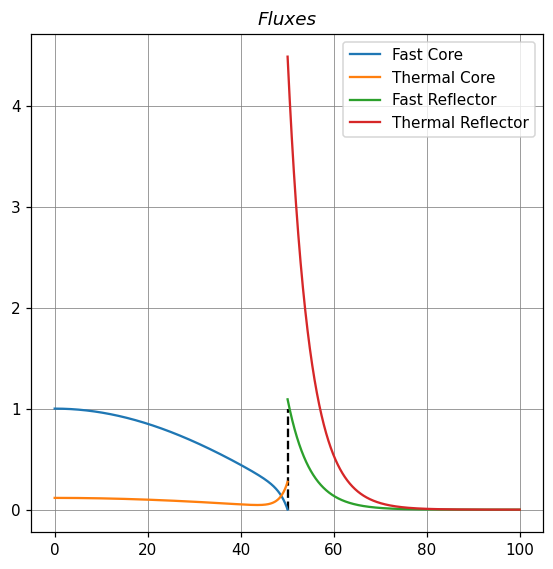

In [ ]:
#Plot

plt.figure(figsize=(6,6), dpi=110)
plt.grid(linewidth=0.5, color="grey")
plt.title("Fluxes", style="italic", fontsize=12)
plt.plot(d, Flux1Clamb(d), label="Fast Core");
plt.plot(d, Flux2Clamb(d), label="Thermal Core");
plt.plot(v, Flux1Rlamb(v), label="Fast Reflector");
plt.plot(v, Flux2Rlamb(v), label="Thermal Reflector");
plt.legend()
plt.vlines(P,0,1,linestyle="--")

print("Coefficients:\n\n" + str(1) + "\n" + str(B1sol) + "\n" + str(F1sol) + "\n" + str(E2sol) + "\n")

The final result is far away from the correct one, I tried to solve the problem but I failed...

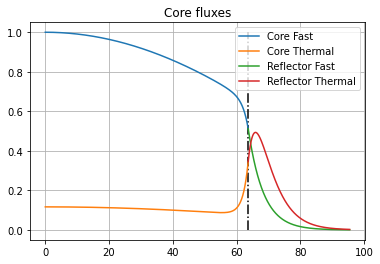